In [1]:
from regain.datasets.hmm import generate_hmm
from regain.hmm.hmm_graphical_lasso import HMM_GraphicalLasso 
import numpy as np
from importlib import reload
import regain.hmm.utils; reload(regain.hmm.utils)
from regain.hmm.utils import results_recap
from regain.hmm.utils import cross_validation#,spread_pred_interpretation
from regain.hmm.utils_pred import Value_from_returns,thetas_comparison
import pickle as pkl
from notebooks.hmm.pred_func import pred_regression_methods
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

/Users/federicociech/.local/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)
/Users/federicociech/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
Using TensorFlow backend.


In [97]:
N_samples = 1000
N_states = 2
N_TS = 10
sigma_Normal = 1

dataset = generate_hmm(n_samples= N_samples,
                       n_states=N_states,
                       n_dim_obs=N_TS,
                       mode_precisions='regain_random',
                       mode_mean = 'Normal',
                       transition_type='fixed',
                       sigma=sigma_Normal)
N_pred = 10

[1005.02979792 1004.79433747 1005.35517178 1002.49806863 1004.01752885
 1008.32963404 1001.54501385 1008.09875342 1008.46696607 1007.38063597]


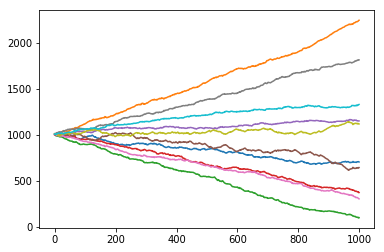

In [99]:
p_vec_0 = np.random.uniform(0,10,N_TS)+1000
Data = np.zeros((np.size(dataset['data'],axis=0),N_TS))
print(p_vec_0)
for j in range(N_TS):
    #print(p_vec_0[j])
    #print(np.cumsum(dataset['data'][:,j]))
    plt.plot(p_vec_0[j]+np.cumsum(dataset['data'][:,j]))
    Data[:,j] = p_vec_0[j]+np.cumsum(dataset['data'][:,j])
    
plt.show()

[1]	valid_0's l1: 1.62679	valid_0's l2: 3.79072
Training until validation scores don't improve for 10 rounds
[2]	valid_0's l1: 1.62729	valid_0's l2: 3.75386
[3]	valid_0's l1: 1.64607	valid_0's l2: 3.77721
[4]	valid_0's l1: 1.64964	valid_0's l2: 3.77026
[5]	valid_0's l1: 1.66523	valid_0's l2: 3.86193
[6]	valid_0's l1: 1.66773	valid_0's l2: 3.85691
[7]	valid_0's l1: 1.66375	valid_0's l2: 3.84942
[8]	valid_0's l1: 1.6635	valid_0's l2: 3.86216
[9]	valid_0's l1: 1.65631	valid_0's l2: 3.88462
[10]	valid_0's l1: 1.65434	valid_0's l2: 3.88376
[11]	valid_0's l1: 1.66665	valid_0's l2: 3.94265
Early stopping, best iteration is:
[1]	valid_0's l1: 1.62679	valid_0's l2: 3.79072
[1]	valid_0's l1: 2.04764	valid_0's l2: 7.74246
Training until validation scores don't improve for 10 rounds
[2]	valid_0's l1: 2.05881	valid_0's l2: 7.71885
[3]	valid_0's l1: 2.05372	valid_0's l2: 7.76395
[4]	valid_0's l1: 2.04093	valid_0's l2: 7.66317
[5]	valid_0's l1: 2.0374	valid_0's l2: 7.71157
[6]	valid_0's l1: 2.05747	v

[13]	valid_0's l1: 1.4979	valid_0's l2: 3.14345
[14]	valid_0's l1: 1.48261	valid_0's l2: 3.05107
[15]	valid_0's l1: 1.48607	valid_0's l2: 3.05981
[16]	valid_0's l1: 1.4785	valid_0's l2: 3.03634
Early stopping, best iteration is:
[6]	valid_0's l1: 1.51051	valid_0's l2: 3.03115
[1]	valid_0's l1: 1.64951	valid_0's l2: 3.8206
Training until validation scores don't improve for 10 rounds
[2]	valid_0's l1: 1.65204	valid_0's l2: 3.78295
[3]	valid_0's l1: 1.68265	valid_0's l2: 3.86929
[4]	valid_0's l1: 1.69249	valid_0's l2: 3.88363
[5]	valid_0's l1: 1.73221	valid_0's l2: 4.0523
[6]	valid_0's l1: 1.74502	valid_0's l2: 4.06395
[7]	valid_0's l1: 1.75908	valid_0's l2: 4.08435
[8]	valid_0's l1: 1.76946	valid_0's l2: 4.11231
[9]	valid_0's l1: 1.77382	valid_0's l2: 4.15236
[10]	valid_0's l1: 1.78035	valid_0's l2: 4.15066
[11]	valid_0's l1: 1.78927	valid_0's l2: 4.20836
Early stopping, best iteration is:
[1]	valid_0's l1: 1.64951	valid_0's l2: 3.8206
[1]	valid_0's l1: 2.08041	valid_0's l2: 7.73698
Trai

[29]	valid_0's l1: 1.61298	valid_0's l2: 3.29046
[30]	valid_0's l1: 1.62593	valid_0's l2: 3.30147
[31]	valid_0's l1: 1.61618	valid_0's l2: 3.2681
[32]	valid_0's l1: 1.61765	valid_0's l2: 3.28071
[33]	valid_0's l1: 1.61919	valid_0's l2: 3.29378
[34]	valid_0's l1: 1.62751	valid_0's l2: 3.32046
[35]	valid_0's l1: 1.65192	valid_0's l2: 3.41369
Early stopping, best iteration is:
[25]	valid_0's l1: 1.57114	valid_0's l2: 3.1933
[1]	valid_0's l1: 1.4478	valid_0's l2: 2.5461
Training until validation scores don't improve for 10 rounds
[2]	valid_0's l1: 1.45629	valid_0's l2: 2.57647
[3]	valid_0's l1: 1.47425	valid_0's l2: 2.59463
[4]	valid_0's l1: 1.47684	valid_0's l2: 2.60367
[5]	valid_0's l1: 1.49354	valid_0's l2: 2.67899
[6]	valid_0's l1: 1.50535	valid_0's l2: 2.69942
[7]	valid_0's l1: 1.51672	valid_0's l2: 2.7252
[8]	valid_0's l1: 1.52657	valid_0's l2: 2.73693
[9]	valid_0's l1: 1.53644	valid_0's l2: 2.78699
[10]	valid_0's l1: 1.56555	valid_0's l2: 2.87376
[11]	valid_0's l1: 1.60251	valid_0's

[3]	valid_0's l1: 1.73061	valid_0's l2: 4.63969
[4]	valid_0's l1: 1.7505	valid_0's l2: 4.72085
[5]	valid_0's l1: 1.77616	valid_0's l2: 4.73512
[6]	valid_0's l1: 1.80113	valid_0's l2: 4.9107
[7]	valid_0's l1: 1.8298	valid_0's l2: 5.08235
[8]	valid_0's l1: 1.84687	valid_0's l2: 5.2098
[9]	valid_0's l1: 1.8911	valid_0's l2: 5.43227
[10]	valid_0's l1: 1.89971	valid_0's l2: 5.47719
[11]	valid_0's l1: 1.91778	valid_0's l2: 5.47316
Early stopping, best iteration is:
[1]	valid_0's l1: 1.70594	valid_0's l2: 4.53948
[1]	valid_0's l1: 1.55736	valid_0's l2: 4.1013
Training until validation scores don't improve for 10 rounds
[2]	valid_0's l1: 1.56125	valid_0's l2: 4.12419
[3]	valid_0's l1: 1.55245	valid_0's l2: 4.16819
[4]	valid_0's l1: 1.56029	valid_0's l2: 4.17282
[5]	valid_0's l1: 1.56836	valid_0's l2: 4.21187
[6]	valid_0's l1: 1.56732	valid_0's l2: 4.19734
[7]	valid_0's l1: 1.56951	valid_0's l2: 4.24374
[8]	valid_0's l1: 1.58972	valid_0's l2: 4.24279
[9]	valid_0's l1: 1.59042	valid_0's l2: 4.23

[5]	valid_0's l1: 1.27696	valid_0's l2: 2.14081
[6]	valid_0's l1: 1.28839	valid_0's l2: 2.21614
[7]	valid_0's l1: 1.32307	valid_0's l2: 2.32932
[8]	valid_0's l1: 1.35099	valid_0's l2: 2.43336
[9]	valid_0's l1: 1.36322	valid_0's l2: 2.44547
[10]	valid_0's l1: 1.35741	valid_0's l2: 2.45173
[11]	valid_0's l1: 1.35354	valid_0's l2: 2.44193
Early stopping, best iteration is:
[1]	valid_0's l1: 1.25806	valid_0's l2: 2.02409
[1]	valid_0's l1: 2.05702	valid_0's l2: 5.37401
Training until validation scores don't improve for 10 rounds
[2]	valid_0's l1: 2.03725	valid_0's l2: 5.32992
[3]	valid_0's l1: 2.02477	valid_0's l2: 5.29214
[4]	valid_0's l1: 2.01244	valid_0's l2: 5.24758
[5]	valid_0's l1: 2.01591	valid_0's l2: 5.24132
[6]	valid_0's l1: 1.99268	valid_0's l2: 5.14839
[7]	valid_0's l1: 2.00033	valid_0's l2: 5.20726
[8]	valid_0's l1: 2.01581	valid_0's l2: 5.27262
[9]	valid_0's l1: 2.02879	valid_0's l2: 5.34095
[10]	valid_0's l1: 2.05041	valid_0's l2: 5.3981
[11]	valid_0's l1: 2.02791	valid_0's l

[2]	valid_0's l1: 2.20387	valid_0's l2: 5.99418
[3]	valid_0's l1: 2.19384	valid_0's l2: 5.99223
[4]	valid_0's l1: 2.18137	valid_0's l2: 5.9413
[5]	valid_0's l1: 2.17174	valid_0's l2: 5.89873
[6]	valid_0's l1: 2.16573	valid_0's l2: 5.82954
[7]	valid_0's l1: 2.16121	valid_0's l2: 5.82634
[8]	valid_0's l1: 2.17099	valid_0's l2: 5.83064
[9]	valid_0's l1: 2.20102	valid_0's l2: 5.97927
[10]	valid_0's l1: 2.21829	valid_0's l2: 6.08313
[11]	valid_0's l1: 2.22877	valid_0's l2: 6.1561
[12]	valid_0's l1: 2.22914	valid_0's l2: 6.09787
[13]	valid_0's l1: 2.23758	valid_0's l2: 6.19549
[14]	valid_0's l1: 2.23021	valid_0's l2: 6.16615
[15]	valid_0's l1: 2.18763	valid_0's l2: 5.95183
[16]	valid_0's l1: 2.1947	valid_0's l2: 6.00376
[17]	valid_0's l1: 2.19529	valid_0's l2: 5.99464
Early stopping, best iteration is:
[7]	valid_0's l1: 2.16121	valid_0's l2: 5.82634
[1]	valid_0's l1: 1.69803	valid_0's l2: 4.56546
Training until validation scores don't improve for 10 rounds
[2]	valid_0's l1: 1.68515	valid_0's

[1]	valid_0's l1: 1.54282	valid_0's l2: 4.15565
Training until validation scores don't improve for 10 rounds
[2]	valid_0's l1: 1.52671	valid_0's l2: 4.1049
[3]	valid_0's l1: 1.54584	valid_0's l2: 4.20833
[4]	valid_0's l1: 1.52673	valid_0's l2: 4.17487
[5]	valid_0's l1: 1.57399	valid_0's l2: 4.35009
[6]	valid_0's l1: 1.57996	valid_0's l2: 4.35966
[7]	valid_0's l1: 1.60993	valid_0's l2: 4.46285
[8]	valid_0's l1: 1.65023	valid_0's l2: 4.63711
[9]	valid_0's l1: 1.68845	valid_0's l2: 4.85277
[10]	valid_0's l1: 1.70118	valid_0's l2: 4.88702
[11]	valid_0's l1: 1.73306	valid_0's l2: 4.98882
[12]	valid_0's l1: 1.7477	valid_0's l2: 5.07191
Early stopping, best iteration is:
[2]	valid_0's l1: 1.52671	valid_0's l2: 4.1049
[1]	valid_0's l1: 1.51282	valid_0's l2: 3.63841
Training until validation scores don't improve for 10 rounds
[2]	valid_0's l1: 1.52171	valid_0's l2: 3.69246
[3]	valid_0's l1: 1.53178	valid_0's l2: 3.74443
[4]	valid_0's l1: 1.55888	valid_0's l2: 3.81827
[5]	valid_0's l1: 1.56735	v

[3]	valid_0's l1: 1.49608	valid_0's l2: 3.40832
[4]	valid_0's l1: 1.50557	valid_0's l2: 3.44457
[5]	valid_0's l1: 1.49873	valid_0's l2: 3.429
[6]	valid_0's l1: 1.50236	valid_0's l2: 3.43973
[7]	valid_0's l1: 1.51031	valid_0's l2: 3.43079
[8]	valid_0's l1: 1.52102	valid_0's l2: 3.48887
[9]	valid_0's l1: 1.53228	valid_0's l2: 3.53989
[10]	valid_0's l1: 1.55078	valid_0's l2: 3.59309
[11]	valid_0's l1: 1.54831	valid_0's l2: 3.57118
Early stopping, best iteration is:
[1]	valid_0's l1: 1.47816	valid_0's l2: 3.33476
[1]	valid_0's l1: 1.59329	valid_0's l2: 4.00493
Training until validation scores don't improve for 10 rounds
[2]	valid_0's l1: 1.61247	valid_0's l2: 3.95288
[3]	valid_0's l1: 1.60521	valid_0's l2: 3.89005
[4]	valid_0's l1: 1.60815	valid_0's l2: 3.82349
[5]	valid_0's l1: 1.64026	valid_0's l2: 3.88791
[6]	valid_0's l1: 1.65606	valid_0's l2: 3.88583
[7]	valid_0's l1: 1.65089	valid_0's l2: 3.8602
[8]	valid_0's l1: 1.67116	valid_0's l2: 3.91428
[9]	valid_0's l1: 1.65735	valid_0's l2: 3

[7]	valid_0's l1: 1.84743	valid_0's l2: 5.40347
[8]	valid_0's l1: 1.8773	valid_0's l2: 5.52457
[9]	valid_0's l1: 1.90247	valid_0's l2: 5.61527
[10]	valid_0's l1: 1.89375	valid_0's l2: 5.57183
[11]	valid_0's l1: 1.91108	valid_0's l2: 5.63184
Early stopping, best iteration is:
[1]	valid_0's l1: 1.77945	valid_0's l2: 5.05491
[1]	valid_0's l1: 2.56225	valid_0's l2: 7.58206
Training until validation scores don't improve for 10 rounds
[2]	valid_0's l1: 2.55163	valid_0's l2: 7.56086
[3]	valid_0's l1: 2.53176	valid_0's l2: 7.47705
[4]	valid_0's l1: 2.53988	valid_0's l2: 7.61344
[5]	valid_0's l1: 2.56337	valid_0's l2: 7.82801
[6]	valid_0's l1: 2.5535	valid_0's l2: 7.82552
[7]	valid_0's l1: 2.53801	valid_0's l2: 7.85253
[8]	valid_0's l1: 2.52035	valid_0's l2: 7.79719
[9]	valid_0's l1: 2.50269	valid_0's l2: 7.73359
[10]	valid_0's l1: 2.49072	valid_0's l2: 7.74047
[11]	valid_0's l1: 2.5067	valid_0's l2: 7.88267
[12]	valid_0's l1: 2.54065	valid_0's l2: 8.11541
[13]	valid_0's l1: 2.54918	valid_0's l

 - 0s - loss: 1.3329 - val_loss: 2.0461
Epoch 28/50
 - 0s - loss: 1.3254 - val_loss: 2.0627
Epoch 29/50
 - 0s - loss: 1.3168 - val_loss: 2.0514
Epoch 30/50
 - 0s - loss: 1.3086 - val_loss: 2.0613
Epoch 31/50
 - 0s - loss: 1.2999 - val_loss: 2.0661
Epoch 32/50
 - 0s - loss: 1.2928 - val_loss: 2.0681
Epoch 33/50
 - 0s - loss: 1.2827 - val_loss: 2.0681
Epoch 34/50
 - 0s - loss: 1.2767 - val_loss: 2.0844
Epoch 35/50
 - 0s - loss: 1.2656 - val_loss: 2.0684
Epoch 36/50
 - 0s - loss: 1.2583 - val_loss: 2.0779
Epoch 37/50
 - 0s - loss: 1.2487 - val_loss: 2.0792
Epoch 38/50
 - 0s - loss: 1.2393 - val_loss: 2.0675
Epoch 39/50
 - 0s - loss: 1.2319 - val_loss: 2.0808
Epoch 40/50
 - 0s - loss: 1.2225 - val_loss: 2.0729
Epoch 41/50
 - 0s - loss: 1.2135 - val_loss: 2.0758
Epoch 42/50
 - 0s - loss: 1.2048 - val_loss: 2.0755
Epoch 43/50
 - 0s - loss: 1.1959 - val_loss: 2.0788
Epoch 44/50
 - 0s - loss: 1.1870 - val_loss: 2.0821
Epoch 45/50
 - 0s - loss: 1.1796 - val_loss: 2.0736
Epoch 46/50
 - 0s - loss

Epoch 33/50
 - 0s - loss: 1.1270 - val_loss: 1.9856
Epoch 34/50
 - 0s - loss: 1.1184 - val_loss: 1.9886
Epoch 35/50
 - 0s - loss: 1.1088 - val_loss: 1.9938
Epoch 36/50
 - 0s - loss: 1.1009 - val_loss: 1.9884
Epoch 37/50
 - 0s - loss: 1.0923 - val_loss: 1.9999
Epoch 38/50
 - 0s - loss: 1.0833 - val_loss: 1.9905
Epoch 39/50
 - 0s - loss: 1.0744 - val_loss: 1.9966
Epoch 40/50
 - 0s - loss: 1.0672 - val_loss: 1.9848
Epoch 41/50
 - 0s - loss: 1.0585 - val_loss: 1.9929
Epoch 42/50
 - 0s - loss: 1.0509 - val_loss: 1.9894
Epoch 43/50
 - 0s - loss: 1.0409 - val_loss: 2.0042
Epoch 44/50
 - 0s - loss: 1.0342 - val_loss: 2.0006
Epoch 45/50
 - 0s - loss: 1.0261 - val_loss: 2.0168
Epoch 46/50
 - 0s - loss: 1.0191 - val_loss: 2.0041
Epoch 47/50
 - 0s - loss: 1.0069 - val_loss: 2.0086
Epoch 48/50
 - 0s - loss: 0.9998 - val_loss: 2.0243
Epoch 49/50
 - 0s - loss: 0.9907 - val_loss: 2.0320
Epoch 50/50
 - 0s - loss: 0.9845 - val_loss: 2.0264
Train on 978 samples, validate on 10 samples
Epoch 1/50
 - 0s - 

Epoch 39/50
 - 0s - loss: 1.2284 - val_loss: 1.6942
Epoch 40/50
 - 0s - loss: 1.2186 - val_loss: 1.6895
Epoch 41/50
 - 0s - loss: 1.2099 - val_loss: 1.6879
Epoch 42/50
 - 0s - loss: 1.2006 - val_loss: 1.6851
Epoch 43/50
 - 0s - loss: 1.1902 - val_loss: 1.6827
Epoch 44/50
 - 0s - loss: 1.1806 - val_loss: 1.6888
Epoch 45/50
 - 0s - loss: 1.1725 - val_loss: 1.6929
Epoch 46/50
 - 0s - loss: 1.1663 - val_loss: 1.7009
Epoch 47/50
 - 0s - loss: 1.1542 - val_loss: 1.7045
Epoch 48/50
 - 0s - loss: 1.1434 - val_loss: 1.7221
Epoch 49/50
 - 0s - loss: 1.1375 - val_loss: 1.7162
Epoch 50/50
 - 0s - loss: 1.1277 - val_loss: 1.7207
Train on 978 samples, validate on 10 samples
Epoch 1/50
 - 0s - loss: 1.9230 - val_loss: 1.7988
Epoch 2/50
 - 0s - loss: 1.8231 - val_loss: 1.8146
Epoch 3/50
 - 0s - loss: 1.7540 - val_loss: 1.8349
Epoch 4/50
 - 0s - loss: 1.7070 - val_loss: 1.8499
Epoch 5/50
 - 0s - loss: 1.6795 - val_loss: 1.8606
Epoch 6/50
 - 0s - loss: 1.6651 - val_loss: 1.8773
Epoch 7/50
 - 0s - loss: 

Epoch 45/50
 - 0s - loss: 1.2585 - val_loss: 2.0913
Epoch 46/50
 - 0s - loss: 1.2461 - val_loss: 2.1201
Epoch 47/50
 - 0s - loss: 1.2363 - val_loss: 2.1095
Epoch 48/50
 - 0s - loss: 1.2246 - val_loss: 2.1146
Epoch 49/50
 - 0s - loss: 1.2118 - val_loss: 2.1301
Epoch 50/50
 - 0s - loss: 1.2014 - val_loss: 2.1287
Train on 979 samples, validate on 10 samples
Epoch 1/50
 - 0s - loss: 1.9095 - val_loss: 2.4510
Epoch 2/50
 - 0s - loss: 1.7554 - val_loss: 2.3154
Epoch 3/50
 - 0s - loss: 1.6408 - val_loss: 2.2016
Epoch 4/50
 - 0s - loss: 1.5717 - val_loss: 2.1544
Epoch 5/50
 - 0s - loss: 1.5408 - val_loss: 2.1313
Epoch 6/50
 - 0s - loss: 1.5244 - val_loss: 2.1064
Epoch 7/50
 - 0s - loss: 1.5081 - val_loss: 2.1084
Epoch 8/50
 - 0s - loss: 1.4928 - val_loss: 2.1126
Epoch 9/50
 - 0s - loss: 1.4784 - val_loss: 2.1064
Epoch 10/50
 - 0s - loss: 1.4664 - val_loss: 2.1069
Epoch 11/50
 - 0s - loss: 1.4557 - val_loss: 2.1072
Epoch 12/50
 - 0s - loss: 1.4450 - val_loss: 2.1040
Epoch 13/50
 - 0s - loss: 1.

Train on 979 samples, validate on 10 samples
Epoch 1/50
 - 0s - loss: 1.4282 - val_loss: 1.7616
Epoch 2/50
 - 0s - loss: 1.3982 - val_loss: 1.7548
Epoch 3/50
 - 0s - loss: 1.3817 - val_loss: 1.7552
Epoch 4/50
 - 0s - loss: 1.3706 - val_loss: 1.7548
Epoch 5/50
 - 0s - loss: 1.3616 - val_loss: 1.7544
Epoch 6/50
 - 0s - loss: 1.3536 - val_loss: 1.7483
Epoch 7/50
 - 0s - loss: 1.3462 - val_loss: 1.7412
Epoch 8/50
 - 0s - loss: 1.3386 - val_loss: 1.7332
Epoch 9/50
 - 0s - loss: 1.3313 - val_loss: 1.7261
Epoch 10/50
 - 0s - loss: 1.3242 - val_loss: 1.7233
Epoch 11/50
 - 0s - loss: 1.3173 - val_loss: 1.7221
Epoch 12/50
 - 0s - loss: 1.3103 - val_loss: 1.7185
Epoch 13/50
 - 0s - loss: 1.3035 - val_loss: 1.7183
Epoch 14/50
 - 0s - loss: 1.2967 - val_loss: 1.7222
Epoch 15/50
 - 0s - loss: 1.2901 - val_loss: 1.7216
Epoch 16/50
 - 0s - loss: 1.2832 - val_loss: 1.7215
Epoch 17/50
 - 0s - loss: 1.2762 - val_loss: 1.7260
Epoch 18/50
 - 0s - loss: 1.2692 - val_loss: 1.7321
Epoch 19/50
 - 0s - loss: 1.

Epoch 6/50
 - 0s - loss: 1.5114 - val_loss: 1.9302
Epoch 7/50
 - 0s - loss: 1.5007 - val_loss: 1.9114
Epoch 8/50
 - 0s - loss: 1.4905 - val_loss: 1.8935
Epoch 9/50
 - 0s - loss: 1.4815 - val_loss: 1.8833
Epoch 10/50
 - 0s - loss: 1.4728 - val_loss: 1.8764
Epoch 11/50
 - 0s - loss: 1.4641 - val_loss: 1.8685
Epoch 12/50
 - 0s - loss: 1.4558 - val_loss: 1.8626
Epoch 13/50
 - 0s - loss: 1.4481 - val_loss: 1.8541
Epoch 14/50
 - 0s - loss: 1.4404 - val_loss: 1.8540
Epoch 15/50
 - 0s - loss: 1.4322 - val_loss: 1.8599
Epoch 16/50
 - 0s - loss: 1.4239 - val_loss: 1.8646
Epoch 17/50
 - 0s - loss: 1.4157 - val_loss: 1.8600
Epoch 18/50
 - 0s - loss: 1.4077 - val_loss: 1.8592
Epoch 19/50
 - 0s - loss: 1.3993 - val_loss: 1.8547
Epoch 20/50
 - 0s - loss: 1.3911 - val_loss: 1.8467
Epoch 21/50
 - 0s - loss: 1.3831 - val_loss: 1.8413
Epoch 22/50
 - 0s - loss: 1.3749 - val_loss: 1.8378
Epoch 23/50
 - 0s - loss: 1.3669 - val_loss: 1.8312
Epoch 24/50
 - 0s - loss: 1.3589 - val_loss: 1.8241
Epoch 25/50
 - 0

Epoch 12/50
 - 0s - loss: 1.5733 - val_loss: 1.7285
Epoch 13/50
 - 0s - loss: 1.5650 - val_loss: 1.7143
Epoch 14/50
 - 0s - loss: 1.5575 - val_loss: 1.7117
Epoch 15/50
 - 0s - loss: 1.5497 - val_loss: 1.7104
Epoch 16/50
 - 0s - loss: 1.5422 - val_loss: 1.6975
Epoch 17/50
 - 0s - loss: 1.5348 - val_loss: 1.7010
Epoch 18/50
 - 0s - loss: 1.5272 - val_loss: 1.6900
Epoch 19/50
 - 0s - loss: 1.5191 - val_loss: 1.6888
Epoch 20/50
 - 0s - loss: 1.5110 - val_loss: 1.6779
Epoch 21/50
 - 0s - loss: 1.5030 - val_loss: 1.6868
Epoch 22/50
 - 0s - loss: 1.4945 - val_loss: 1.6796
Epoch 23/50
 - 0s - loss: 1.4862 - val_loss: 1.6790
Epoch 24/50
 - 0s - loss: 1.4781 - val_loss: 1.6835
Epoch 25/50
 - 0s - loss: 1.4687 - val_loss: 1.6718
Epoch 26/50
 - 0s - loss: 1.4605 - val_loss: 1.6638
Epoch 27/50
 - 0s - loss: 1.4508 - val_loss: 1.6517
Epoch 28/50
 - 0s - loss: 1.4412 - val_loss: 1.6486
Epoch 29/50
 - 0s - loss: 1.4320 - val_loss: 1.6396
Epoch 30/50
 - 0s - loss: 1.4228 - val_loss: 1.6403
Epoch 31/50


Epoch 18/50
 - 0s - loss: 1.5029 - val_loss: 1.8971
Epoch 19/50
 - 0s - loss: 1.4947 - val_loss: 1.9043
Epoch 20/50
 - 0s - loss: 1.4859 - val_loss: 1.9038
Epoch 21/50
 - 0s - loss: 1.4781 - val_loss: 1.8995
Epoch 22/50
 - 0s - loss: 1.4690 - val_loss: 1.9012
Epoch 23/50
 - 0s - loss: 1.4595 - val_loss: 1.9069
Epoch 24/50
 - 0s - loss: 1.4514 - val_loss: 1.9118
Epoch 25/50
 - 0s - loss: 1.4416 - val_loss: 1.9074
Epoch 26/50
 - 0s - loss: 1.4321 - val_loss: 1.9084
Epoch 27/50
 - 0s - loss: 1.4225 - val_loss: 1.8993
Epoch 28/50
 - 0s - loss: 1.4126 - val_loss: 1.9134
Epoch 29/50
 - 0s - loss: 1.4023 - val_loss: 1.9155
Epoch 30/50
 - 0s - loss: 1.3913 - val_loss: 1.9205
Epoch 31/50
 - 0s - loss: 1.3819 - val_loss: 1.8944
Epoch 32/50
 - 0s - loss: 1.3712 - val_loss: 1.8966
Epoch 33/50
 - 0s - loss: 1.3613 - val_loss: 1.8972
Epoch 34/50
 - 0s - loss: 1.3493 - val_loss: 1.8942
Epoch 35/50
 - 0s - loss: 1.3412 - val_loss: 1.8628
Epoch 36/50
 - 0s - loss: 1.3285 - val_loss: 1.8524
Epoch 37/50


Epoch 24/50
 - 0s - loss: 1.4360 - val_loss: 1.3315
Epoch 25/50
 - 0s - loss: 1.4272 - val_loss: 1.3471
Epoch 26/50
 - 0s - loss: 1.4187 - val_loss: 1.3530
Epoch 27/50
 - 0s - loss: 1.4105 - val_loss: 1.3594
Epoch 28/50
 - 0s - loss: 1.4015 - val_loss: 1.3421
Epoch 29/50
 - 0s - loss: 1.3916 - val_loss: 1.3455
Epoch 30/50
 - 0s - loss: 1.3815 - val_loss: 1.3544
Epoch 31/50
 - 0s - loss: 1.3727 - val_loss: 1.3483
Epoch 32/50
 - 0s - loss: 1.3632 - val_loss: 1.3456
Epoch 33/50
 - 0s - loss: 1.3536 - val_loss: 1.3474
Epoch 34/50
 - 0s - loss: 1.3441 - val_loss: 1.3431
Epoch 35/50
 - 0s - loss: 1.3349 - val_loss: 1.3496
Epoch 36/50
 - 0s - loss: 1.3260 - val_loss: 1.3346
Epoch 37/50
 - 0s - loss: 1.3163 - val_loss: 1.3448
Epoch 38/50
 - 0s - loss: 1.3068 - val_loss: 1.3391
Epoch 39/50
 - 0s - loss: 1.2987 - val_loss: 1.3423
Epoch 40/50
 - 0s - loss: 1.2879 - val_loss: 1.3292
Epoch 41/50
 - 0s - loss: 1.2789 - val_loss: 1.3309
Epoch 42/50
 - 0s - loss: 1.2690 - val_loss: 1.3450
Epoch 43/50


Epoch 30/50
 - 0s - loss: 1.2565 - val_loss: 1.5904
Epoch 31/50
 - 0s - loss: 1.2491 - val_loss: 1.5941
Epoch 32/50
 - 0s - loss: 1.2397 - val_loss: 1.5956
Epoch 33/50
 - 0s - loss: 1.2323 - val_loss: 1.5863
Epoch 34/50
 - 0s - loss: 1.2232 - val_loss: 1.5824
Epoch 35/50
 - 0s - loss: 1.2143 - val_loss: 1.5779
Epoch 36/50
 - 0s - loss: 1.2074 - val_loss: 1.5794
Epoch 37/50
 - 0s - loss: 1.1992 - val_loss: 1.5725
Epoch 38/50
 - 0s - loss: 1.1917 - val_loss: 1.5869
Epoch 39/50
 - 0s - loss: 1.1814 - val_loss: 1.5716
Epoch 40/50
 - 0s - loss: 1.1777 - val_loss: 1.5897
Epoch 41/50
 - 0s - loss: 1.1646 - val_loss: 1.5814
Epoch 42/50
 - 0s - loss: 1.1584 - val_loss: 1.5955
Epoch 43/50
 - 0s - loss: 1.1517 - val_loss: 1.6172
Epoch 44/50
 - 0s - loss: 1.1408 - val_loss: 1.5896
Epoch 45/50
 - 0s - loss: 1.1335 - val_loss: 1.6128
Epoch 46/50
 - 0s - loss: 1.1282 - val_loss: 1.6154
Epoch 47/50
 - 0s - loss: 1.1174 - val_loss: 1.6212
Epoch 48/50
 - 0s - loss: 1.1098 - val_loss: 1.5966
Epoch 49/50


Epoch 36/50
 - 0s - loss: 1.2698 - val_loss: 1.9030
Epoch 37/50
 - 0s - loss: 1.2592 - val_loss: 1.9099
Epoch 38/50
 - 0s - loss: 1.2517 - val_loss: 1.9216
Epoch 39/50
 - 0s - loss: 1.2424 - val_loss: 1.9308
Epoch 40/50
 - 0s - loss: 1.2339 - val_loss: 1.9362
Epoch 41/50
 - 0s - loss: 1.2239 - val_loss: 1.9560
Epoch 42/50
 - 0s - loss: 1.2157 - val_loss: 1.9632
Epoch 43/50
 - 0s - loss: 1.2060 - val_loss: 1.9674
Epoch 44/50
 - 0s - loss: 1.1984 - val_loss: 1.9773
Epoch 45/50
 - 0s - loss: 1.1893 - val_loss: 1.9875
Epoch 46/50
 - 0s - loss: 1.1800 - val_loss: 1.9870
Epoch 47/50
 - 0s - loss: 1.1711 - val_loss: 2.0000
Epoch 48/50
 - 0s - loss: 1.1611 - val_loss: 1.9950
Epoch 49/50
 - 0s - loss: 1.1536 - val_loss: 1.9988
Epoch 50/50
 - 0s - loss: 1.1434 - val_loss: 2.0187
Train on 981 samples, validate on 10 samples
Epoch 1/50
 - 0s - loss: 1.6944 - val_loss: 1.8442
Epoch 2/50
 - 0s - loss: 1.6525 - val_loss: 1.8565
Epoch 3/50
 - 0s - loss: 1.6329 - val_loss: 1.8776
Epoch 4/50
 - 0s - los

Epoch 42/50
 - 0s - loss: 1.4214 - val_loss: 1.6283
Epoch 43/50
 - 0s - loss: 1.4131 - val_loss: 1.6367
Epoch 44/50
 - 0s - loss: 1.3993 - val_loss: 1.6414
Epoch 45/50
 - 0s - loss: 1.3881 - val_loss: 1.6403
Epoch 46/50
 - 0s - loss: 1.3790 - val_loss: 1.6608
Epoch 47/50
 - 0s - loss: 1.3669 - val_loss: 1.6487
Epoch 48/50
 - 0s - loss: 1.3561 - val_loss: 1.6598
Epoch 49/50
 - 0s - loss: 1.3457 - val_loss: 1.6927
Epoch 50/50
 - 0s - loss: 1.3328 - val_loss: 1.6899
Train on 981 samples, validate on 10 samples
Epoch 1/50
 - 0s - loss: 1.6939 - val_loss: 1.4889
Epoch 2/50
 - 0s - loss: 1.6465 - val_loss: 1.3894
Epoch 3/50
 - 0s - loss: 1.6227 - val_loss: 1.3514
Epoch 4/50
 - 0s - loss: 1.6093 - val_loss: 1.3244
Epoch 5/50
 - 0s - loss: 1.5994 - val_loss: 1.3058
Epoch 6/50
 - 0s - loss: 1.5910 - val_loss: 1.2923
Epoch 7/50
 - 0s - loss: 1.5830 - val_loss: 1.2874
Epoch 8/50
 - 0s - loss: 1.5754 - val_loss: 1.2870
Epoch 9/50
 - 0s - loss: 1.5675 - val_loss: 1.2859
Epoch 10/50
 - 0s - loss: 1.

Epoch 48/50
 - 0s - loss: 1.2209 - val_loss: 1.5004
Epoch 49/50
 - 0s - loss: 1.2131 - val_loss: 1.5109
Epoch 50/50
 - 0s - loss: 1.2017 - val_loss: 1.4902
Train on 981 samples, validate on 10 samples
Epoch 1/50
 - 0s - loss: 1.5139 - val_loss: 2.0241
Epoch 2/50
 - 0s - loss: 1.4936 - val_loss: 2.0248
Epoch 3/50
 - 0s - loss: 1.4825 - val_loss: 2.0256
Epoch 4/50
 - 0s - loss: 1.4735 - val_loss: 2.0265
Epoch 5/50
 - 0s - loss: 1.4650 - val_loss: 2.0277
Epoch 6/50
 - 0s - loss: 1.4572 - val_loss: 2.0293
Epoch 7/50
 - 0s - loss: 1.4495 - val_loss: 2.0268
Epoch 8/50
 - 0s - loss: 1.4422 - val_loss: 2.0227
Epoch 9/50
 - 0s - loss: 1.4350 - val_loss: 2.0196
Epoch 10/50
 - 0s - loss: 1.4276 - val_loss: 2.0166
Epoch 11/50
 - 0s - loss: 1.4203 - val_loss: 2.0134
Epoch 12/50
 - 0s - loss: 1.4125 - val_loss: 2.0077
Epoch 13/50
 - 0s - loss: 1.4053 - val_loss: 2.0056
Epoch 14/50
 - 0s - loss: 1.3976 - val_loss: 2.0030
Epoch 15/50
 - 0s - loss: 1.3903 - val_loss: 1.9993
Epoch 16/50
 - 0s - loss: 1.

Epoch 3/50
 - 0s - loss: 1.5905 - val_loss: 1.4657
Epoch 4/50
 - 0s - loss: 1.5680 - val_loss: 1.4506
Epoch 5/50
 - 0s - loss: 1.5500 - val_loss: 1.4623
Epoch 6/50
 - 0s - loss: 1.5351 - val_loss: 1.4880
Epoch 7/50
 - 0s - loss: 1.5227 - val_loss: 1.5102
Epoch 8/50
 - 0s - loss: 1.5119 - val_loss: 1.5308
Epoch 9/50
 - 0s - loss: 1.5017 - val_loss: 1.5530
Epoch 10/50
 - 0s - loss: 1.4924 - val_loss: 1.5725
Epoch 11/50
 - 0s - loss: 1.4832 - val_loss: 1.5945
Epoch 12/50
 - 0s - loss: 1.4741 - val_loss: 1.6123
Epoch 13/50
 - 0s - loss: 1.4649 - val_loss: 1.6319
Epoch 14/50
 - 0s - loss: 1.4553 - val_loss: 1.6509
Epoch 15/50
 - 0s - loss: 1.4460 - val_loss: 1.6651
Epoch 16/50
 - 0s - loss: 1.4370 - val_loss: 1.6720
Epoch 17/50
 - 0s - loss: 1.4277 - val_loss: 1.6811
Epoch 18/50
 - 0s - loss: 1.4194 - val_loss: 1.6847
Epoch 19/50
 - 0s - loss: 1.4102 - val_loss: 1.6993
Epoch 20/50
 - 0s - loss: 1.4021 - val_loss: 1.7096
Epoch 21/50
 - 0s - loss: 1.3923 - val_loss: 1.7253
Epoch 22/50
 - 0s -

Epoch 9/50
 - 0s - loss: 1.7637 - val_loss: 1.9530
Epoch 10/50
 - 0s - loss: 1.7518 - val_loss: 1.9437
Epoch 11/50
 - 0s - loss: 1.7402 - val_loss: 1.9428
Epoch 12/50
 - 0s - loss: 1.7294 - val_loss: 1.9392
Epoch 13/50
 - 0s - loss: 1.7184 - val_loss: 1.9352
Epoch 14/50
 - 0s - loss: 1.7082 - val_loss: 1.9277
Epoch 15/50
 - 0s - loss: 1.6978 - val_loss: 1.9289
Epoch 16/50
 - 0s - loss: 1.6877 - val_loss: 1.9304
Epoch 17/50
 - 0s - loss: 1.6770 - val_loss: 1.9302
Epoch 18/50
 - 0s - loss: 1.6669 - val_loss: 1.9229
Epoch 19/50
 - 0s - loss: 1.6568 - val_loss: 1.9164
Epoch 20/50
 - 0s - loss: 1.6462 - val_loss: 1.9085
Epoch 21/50
 - 0s - loss: 1.6353 - val_loss: 1.9087
Epoch 22/50
 - 0s - loss: 1.6252 - val_loss: 1.9120
Epoch 23/50
 - 0s - loss: 1.6143 - val_loss: 1.9056
Epoch 24/50
 - 0s - loss: 1.6035 - val_loss: 1.9049
Epoch 25/50
 - 0s - loss: 1.5924 - val_loss: 1.9025
Epoch 26/50
 - 0s - loss: 1.5822 - val_loss: 1.8965
Epoch 27/50
 - 0s - loss: 1.5708 - val_loss: 1.8999
Epoch 28/50
 

Epoch 15/50
 - 0s - loss: 1.5861 - val_loss: 1.4106
Epoch 16/50
 - 0s - loss: 1.5775 - val_loss: 1.4100
Epoch 17/50
 - 0s - loss: 1.5691 - val_loss: 1.4052
Epoch 18/50
 - 0s - loss: 1.5605 - val_loss: 1.3983
Epoch 19/50
 - 0s - loss: 1.5516 - val_loss: 1.3948
Epoch 20/50
 - 0s - loss: 1.5420 - val_loss: 1.3862
Epoch 21/50
 - 0s - loss: 1.5323 - val_loss: 1.3901
Epoch 22/50
 - 0s - loss: 1.5224 - val_loss: 1.3901
Epoch 23/50
 - 0s - loss: 1.5123 - val_loss: 1.3857
Epoch 24/50
 - 0s - loss: 1.5029 - val_loss: 1.3807
Epoch 25/50
 - 0s - loss: 1.4928 - val_loss: 1.3918
Epoch 26/50
 - 0s - loss: 1.4833 - val_loss: 1.3766
Epoch 27/50
 - 0s - loss: 1.4736 - val_loss: 1.3862
Epoch 28/50
 - 0s - loss: 1.4637 - val_loss: 1.3849
Epoch 29/50
 - 0s - loss: 1.4533 - val_loss: 1.3864
Epoch 30/50
 - 0s - loss: 1.4434 - val_loss: 1.4009
Epoch 31/50
 - 0s - loss: 1.4324 - val_loss: 1.3906
Epoch 32/50
 - 0s - loss: 1.4218 - val_loss: 1.3967
Epoch 33/50
 - 0s - loss: 1.4110 - val_loss: 1.3954
Epoch 34/50


Epoch 21/50
 - 0s - loss: 1.3732 - val_loss: 1.6967
Epoch 22/50
 - 0s - loss: 1.3645 - val_loss: 1.6933
Epoch 23/50
 - 0s - loss: 1.3556 - val_loss: 1.6905
Epoch 24/50
 - 0s - loss: 1.3463 - val_loss: 1.6908
Epoch 25/50
 - 0s - loss: 1.3374 - val_loss: 1.6884
Epoch 26/50
 - 0s - loss: 1.3292 - val_loss: 1.6882
Epoch 27/50
 - 0s - loss: 1.3205 - val_loss: 1.6883
Epoch 28/50
 - 0s - loss: 1.3123 - val_loss: 1.6799
Epoch 29/50
 - 0s - loss: 1.3037 - val_loss: 1.6837
Epoch 30/50
 - 0s - loss: 1.2955 - val_loss: 1.6827
Epoch 31/50
 - 0s - loss: 1.2882 - val_loss: 1.6894
Epoch 32/50
 - 0s - loss: 1.2800 - val_loss: 1.6920
Epoch 33/50
 - 0s - loss: 1.2728 - val_loss: 1.7018
Epoch 34/50
 - 0s - loss: 1.2654 - val_loss: 1.7058
Epoch 35/50
 - 0s - loss: 1.2579 - val_loss: 1.6953
Epoch 36/50
 - 0s - loss: 1.2503 - val_loss: 1.7099
Epoch 37/50
 - 0s - loss: 1.2430 - val_loss: 1.7175
Epoch 38/50
 - 0s - loss: 1.2356 - val_loss: 1.7296
Epoch 39/50
 - 0s - loss: 1.2282 - val_loss: 1.7310
Epoch 40/50


Epoch 27/50
 - 0s - loss: 1.2051 - val_loss: 2.0174
Epoch 28/50
 - 0s - loss: 1.1975 - val_loss: 2.0075
Epoch 29/50
 - 0s - loss: 1.1920 - val_loss: 2.0174
Epoch 30/50
 - 0s - loss: 1.1823 - val_loss: 2.0043
Epoch 31/50
 - 0s - loss: 1.1751 - val_loss: 2.0073
Epoch 32/50
 - 0s - loss: 1.1678 - val_loss: 2.0205
Epoch 33/50
 - 0s - loss: 1.1600 - val_loss: 2.0008
Epoch 34/50
 - 0s - loss: 1.1516 - val_loss: 2.0277
Epoch 35/50
 - 0s - loss: 1.1434 - val_loss: 2.0284
Epoch 36/50
 - 0s - loss: 1.1362 - val_loss: 2.0343
Epoch 37/50
 - 0s - loss: 1.1291 - val_loss: 2.0230
Epoch 38/50
 - 0s - loss: 1.1188 - val_loss: 2.0385
Epoch 39/50
 - 0s - loss: 1.1120 - val_loss: 2.0321
Epoch 40/50
 - 0s - loss: 1.1044 - val_loss: 2.0553
Epoch 41/50
 - 0s - loss: 1.0930 - val_loss: 2.0553
Epoch 42/50
 - 0s - loss: 1.0848 - val_loss: 2.0579
Epoch 43/50
 - 0s - loss: 1.0765 - val_loss: 2.0577
Epoch 44/50
 - 0s - loss: 1.0672 - val_loss: 2.0536
Epoch 45/50
 - 0s - loss: 1.0584 - val_loss: 2.0755
Epoch 46/50


Epoch 33/50
 - 0s - loss: 1.2969 - val_loss: 2.2627
Epoch 34/50
 - 0s - loss: 1.2889 - val_loss: 2.2667
Epoch 35/50
 - 0s - loss: 1.2807 - val_loss: 2.2753
Epoch 36/50
 - 0s - loss: 1.2719 - val_loss: 2.2825
Epoch 37/50
 - 0s - loss: 1.2640 - val_loss: 2.2824
Epoch 38/50
 - 0s - loss: 1.2556 - val_loss: 2.2880
Epoch 39/50
 - 0s - loss: 1.2464 - val_loss: 2.2925
Epoch 40/50
 - 0s - loss: 1.2377 - val_loss: 2.2900
Epoch 41/50
 - 0s - loss: 1.2297 - val_loss: 2.2922
Epoch 42/50
 - 0s - loss: 1.2209 - val_loss: 2.2894
Epoch 43/50
 - 0s - loss: 1.2108 - val_loss: 2.2915
Epoch 44/50
 - 0s - loss: 1.2020 - val_loss: 2.2834
Epoch 45/50
 - 0s - loss: 1.1954 - val_loss: 2.2830
Epoch 46/50
 - 0s - loss: 1.1837 - val_loss: 2.2767
Epoch 47/50
 - 0s - loss: 1.1746 - val_loss: 2.2901
Epoch 48/50
 - 0s - loss: 1.1655 - val_loss: 2.2831
Epoch 49/50
 - 0s - loss: 1.1554 - val_loss: 2.2868
Epoch 50/50
 - 0s - loss: 1.1471 - val_loss: 2.2703
Train on 983 samples, validate on 10 samples
Epoch 1/50
 - 0s - 

Epoch 39/50
 - 0s - loss: 1.3295 - val_loss: 1.6648
Epoch 40/50
 - 0s - loss: 1.3179 - val_loss: 1.6573
Epoch 41/50
 - 0s - loss: 1.3081 - val_loss: 1.6539
Epoch 42/50
 - 0s - loss: 1.2978 - val_loss: 1.6472
Epoch 43/50
 - 0s - loss: 1.2864 - val_loss: 1.6489
Epoch 44/50
 - 0s - loss: 1.2762 - val_loss: 1.6464
Epoch 45/50
 - 0s - loss: 1.2654 - val_loss: 1.6536
Epoch 46/50
 - 0s - loss: 1.2560 - val_loss: 1.6507
Epoch 47/50
 - 0s - loss: 1.2460 - val_loss: 1.6487
Epoch 48/50
 - 0s - loss: 1.2328 - val_loss: 1.6644
Epoch 49/50
 - 0s - loss: 1.2220 - val_loss: 1.6534
Epoch 50/50
 - 0s - loss: 1.2116 - val_loss: 1.6735
Train on 984 samples, validate on 10 samples
Epoch 1/50
 - 0s - loss: 1.9623 - val_loss: 1.9669
Epoch 2/50
 - 0s - loss: 1.8180 - val_loss: 1.8619
Epoch 3/50
 - 0s - loss: 1.6961 - val_loss: 1.7700
Epoch 4/50
 - 0s - loss: 1.6097 - val_loss: 1.6954
Epoch 5/50
 - 0s - loss: 1.5596 - val_loss: 1.6452
Epoch 6/50
 - 0s - loss: 1.5373 - val_loss: 1.6204
Epoch 7/50
 - 0s - loss: 

Epoch 45/50
 - 0s - loss: 1.2918 - val_loss: 1.9736
Epoch 46/50
 - 0s - loss: 1.2822 - val_loss: 2.0016
Epoch 47/50
 - 0s - loss: 1.2736 - val_loss: 1.9840
Epoch 48/50
 - 0s - loss: 1.2642 - val_loss: 1.9873
Epoch 49/50
 - 0s - loss: 1.2554 - val_loss: 2.0194
Epoch 50/50
 - 0s - loss: 1.2462 - val_loss: 2.0280
Train on 984 samples, validate on 10 samples
Epoch 1/50
 - 0s - loss: 1.4083 - val_loss: 1.8024
Epoch 2/50
 - 0s - loss: 1.3900 - val_loss: 1.8101
Epoch 3/50
 - 0s - loss: 1.3797 - val_loss: 1.8100
Epoch 4/50
 - 0s - loss: 1.3709 - val_loss: 1.8076
Epoch 5/50
 - 0s - loss: 1.3626 - val_loss: 1.8005
Epoch 6/50
 - 0s - loss: 1.3546 - val_loss: 1.7948
Epoch 7/50
 - 0s - loss: 1.3464 - val_loss: 1.7852
Epoch 8/50
 - 0s - loss: 1.3382 - val_loss: 1.7782
Epoch 9/50
 - 0s - loss: 1.3299 - val_loss: 1.7747
Epoch 10/50
 - 0s - loss: 1.3216 - val_loss: 1.7860
Epoch 11/50
 - 0s - loss: 1.3134 - val_loss: 1.7960
Epoch 12/50
 - 0s - loss: 1.3050 - val_loss: 1.8012
Epoch 13/50
 - 0s - loss: 1.

Train on 984 samples, validate on 10 samples
Epoch 1/50
 - 0s - loss: 1.6687 - val_loss: 2.2049
Epoch 2/50
 - 0s - loss: 1.6037 - val_loss: 2.2160
Epoch 3/50
 - 0s - loss: 1.5652 - val_loss: 2.2442
Epoch 4/50
 - 0s - loss: 1.5427 - val_loss: 2.2751
Epoch 5/50
 - 0s - loss: 1.5274 - val_loss: 2.3115
Epoch 6/50
 - 0s - loss: 1.5155 - val_loss: 2.3352
Epoch 7/50
 - 0s - loss: 1.5064 - val_loss: 2.3466
Epoch 8/50
 - 0s - loss: 1.4974 - val_loss: 2.3551
Epoch 9/50
 - 0s - loss: 1.4886 - val_loss: 2.3640
Epoch 10/50
 - 0s - loss: 1.4798 - val_loss: 2.3736
Epoch 11/50
 - 0s - loss: 1.4715 - val_loss: 2.3812
Epoch 12/50
 - 0s - loss: 1.4633 - val_loss: 2.3886
Epoch 13/50
 - 0s - loss: 1.4554 - val_loss: 2.3949
Epoch 14/50
 - 0s - loss: 1.4479 - val_loss: 2.4023
Epoch 15/50
 - 0s - loss: 1.4405 - val_loss: 2.4044
Epoch 16/50
 - 0s - loss: 1.4330 - val_loss: 2.4092
Epoch 17/50
 - 0s - loss: 1.4259 - val_loss: 2.4139
Epoch 18/50
 - 0s - loss: 1.4179 - val_loss: 2.4153
Epoch 19/50
 - 0s - loss: 1.

Epoch 6/50
 - 0s - loss: 1.6240 - val_loss: 1.8937
Epoch 7/50
 - 0s - loss: 1.6155 - val_loss: 1.8918
Epoch 8/50
 - 0s - loss: 1.6075 - val_loss: 1.8874
Epoch 9/50
 - 0s - loss: 1.5996 - val_loss: 1.8888
Epoch 10/50
 - 0s - loss: 1.5922 - val_loss: 1.8847
Epoch 11/50
 - 0s - loss: 1.5851 - val_loss: 1.8799
Epoch 12/50
 - 0s - loss: 1.5779 - val_loss: 1.8834
Epoch 13/50
 - 0s - loss: 1.5710 - val_loss: 1.8858
Epoch 14/50
 - 0s - loss: 1.5635 - val_loss: 1.8903
Epoch 15/50
 - 0s - loss: 1.5567 - val_loss: 1.8945
Epoch 16/50
 - 0s - loss: 1.5495 - val_loss: 1.8917
Epoch 17/50
 - 0s - loss: 1.5426 - val_loss: 1.8930
Epoch 18/50
 - 0s - loss: 1.5352 - val_loss: 1.8939
Epoch 19/50
 - 0s - loss: 1.5277 - val_loss: 1.8989
Epoch 20/50
 - 0s - loss: 1.5198 - val_loss: 1.8976
Epoch 21/50
 - 0s - loss: 1.5117 - val_loss: 1.8951
Epoch 22/50
 - 0s - loss: 1.5034 - val_loss: 1.8923
Epoch 23/50
 - 0s - loss: 1.4948 - val_loss: 1.9087
Epoch 24/50
 - 0s - loss: 1.4856 - val_loss: 1.9065
Epoch 25/50
 - 0

Epoch 12/50
 - 0s - loss: 1.5555 - val_loss: 1.8657
Epoch 13/50
 - 0s - loss: 1.5478 - val_loss: 1.8873
Epoch 14/50
 - 0s - loss: 1.5396 - val_loss: 1.9102
Epoch 15/50
 - 0s - loss: 1.5314 - val_loss: 1.9371
Epoch 16/50
 - 0s - loss: 1.5228 - val_loss: 1.9553
Epoch 17/50
 - 0s - loss: 1.5144 - val_loss: 1.9738
Epoch 18/50
 - 0s - loss: 1.5063 - val_loss: 1.9909
Epoch 19/50
 - 0s - loss: 1.4975 - val_loss: 2.0159
Epoch 20/50
 - 0s - loss: 1.4902 - val_loss: 2.0147
Epoch 21/50
 - 0s - loss: 1.4808 - val_loss: 2.0363
Epoch 22/50
 - 0s - loss: 1.4730 - val_loss: 2.0333
Epoch 23/50
 - 0s - loss: 1.4634 - val_loss: 2.0688
Epoch 24/50
 - 0s - loss: 1.4550 - val_loss: 2.0648
Epoch 25/50
 - 0s - loss: 1.4453 - val_loss: 2.0710
Epoch 26/50
 - 0s - loss: 1.4373 - val_loss: 2.0904
Epoch 27/50
 - 0s - loss: 1.4280 - val_loss: 2.0835
Epoch 28/50
 - 0s - loss: 1.4198 - val_loss: 2.0919
Epoch 29/50
 - 0s - loss: 1.4098 - val_loss: 2.1090
Epoch 30/50
 - 0s - loss: 1.4006 - val_loss: 2.1225
Epoch 31/50


Epoch 18/50
 - 0s - loss: 1.4914 - val_loss: 1.4987
Epoch 19/50
 - 0s - loss: 1.4822 - val_loss: 1.5071
Epoch 20/50
 - 0s - loss: 1.4729 - val_loss: 1.5110
Epoch 21/50
 - 0s - loss: 1.4641 - val_loss: 1.5155
Epoch 22/50
 - 0s - loss: 1.4545 - val_loss: 1.5388
Epoch 23/50
 - 0s - loss: 1.4455 - val_loss: 1.5348
Epoch 24/50
 - 0s - loss: 1.4352 - val_loss: 1.5521
Epoch 25/50
 - 0s - loss: 1.4260 - val_loss: 1.5543
Epoch 26/50
 - 0s - loss: 1.4172 - val_loss: 1.5654
Epoch 27/50
 - 0s - loss: 1.4081 - val_loss: 1.5675
Epoch 28/50
 - 0s - loss: 1.3995 - val_loss: 1.5791
Epoch 29/50
 - 0s - loss: 1.3898 - val_loss: 1.5775
Epoch 30/50
 - 0s - loss: 1.3807 - val_loss: 1.5800
Epoch 31/50
 - 0s - loss: 1.3720 - val_loss: 1.6068
Epoch 32/50
 - 0s - loss: 1.3630 - val_loss: 1.5899
Epoch 33/50
 - 0s - loss: 1.3526 - val_loss: 1.6182
Epoch 34/50
 - 0s - loss: 1.3434 - val_loss: 1.6112
Epoch 35/50
 - 0s - loss: 1.3325 - val_loss: 1.6186
Epoch 36/50
 - 0s - loss: 1.3227 - val_loss: 1.6185
Epoch 37/50


Epoch 24/50
 - 0s - loss: 1.3038 - val_loss: 2.5579
Epoch 25/50
 - 0s - loss: 1.2957 - val_loss: 2.5686
Epoch 26/50
 - 0s - loss: 1.2869 - val_loss: 2.5581
Epoch 27/50
 - 0s - loss: 1.2788 - val_loss: 2.5594
Epoch 28/50
 - 0s - loss: 1.2702 - val_loss: 2.5690
Epoch 29/50
 - 0s - loss: 1.2620 - val_loss: 2.5702
Epoch 30/50
 - 0s - loss: 1.2541 - val_loss: 2.5605
Epoch 31/50
 - 0s - loss: 1.2451 - val_loss: 2.5679
Epoch 32/50
 - 0s - loss: 1.2355 - val_loss: 2.5554
Epoch 33/50
 - 0s - loss: 1.2281 - val_loss: 2.5514
Epoch 34/50
 - 0s - loss: 1.2188 - val_loss: 2.5581
Epoch 35/50
 - 0s - loss: 1.2101 - val_loss: 2.5522
Epoch 36/50
 - 0s - loss: 1.2012 - val_loss: 2.5562
Epoch 37/50
 - 0s - loss: 1.1922 - val_loss: 2.5591
Epoch 38/50
 - 0s - loss: 1.1830 - val_loss: 2.5702
Epoch 39/50
 - 0s - loss: 1.1770 - val_loss: 2.5320
Epoch 40/50
 - 0s - loss: 1.1662 - val_loss: 2.5626
Epoch 41/50
 - 0s - loss: 1.1573 - val_loss: 2.5731
Epoch 42/50
 - 0s - loss: 1.1509 - val_loss: 2.5642
Epoch 43/50


Epoch 30/50
 - 0s - loss: 1.3058 - val_loss: 2.0763
Epoch 31/50
 - 0s - loss: 1.2960 - val_loss: 2.0921
Epoch 32/50
 - 0s - loss: 1.2879 - val_loss: 2.1031
Epoch 33/50
 - 0s - loss: 1.2791 - val_loss: 2.1111
Epoch 34/50
 - 0s - loss: 1.2704 - val_loss: 2.1081
Epoch 35/50
 - 0s - loss: 1.2613 - val_loss: 2.1248
Epoch 36/50
 - 0s - loss: 1.2537 - val_loss: 2.1308
Epoch 37/50
 - 0s - loss: 1.2439 - val_loss: 2.1429
Epoch 38/50
 - 0s - loss: 1.2358 - val_loss: 2.1442
Epoch 39/50
 - 0s - loss: 1.2266 - val_loss: 2.1711
Epoch 40/50
 - 0s - loss: 1.2185 - val_loss: 2.1618
Epoch 41/50
 - 0s - loss: 1.2083 - val_loss: 2.1777
Epoch 42/50
 - 0s - loss: 1.1985 - val_loss: 2.1824
Epoch 43/50
 - 0s - loss: 1.1912 - val_loss: 2.2119
Epoch 44/50
 - 0s - loss: 1.1808 - val_loss: 2.2165
Epoch 45/50
 - 0s - loss: 1.1724 - val_loss: 2.2177
Epoch 46/50
 - 0s - loss: 1.1622 - val_loss: 2.2180
Epoch 47/50
 - 0s - loss: 1.1562 - val_loss: 2.2333
Epoch 48/50
 - 0s - loss: 1.1442 - val_loss: 2.2498
Epoch 49/50


Epoch 36/50
 - 0s - loss: 1.5240 - val_loss: 2.5347
Epoch 37/50
 - 0s - loss: 1.5141 - val_loss: 2.5401
Epoch 38/50
 - 0s - loss: 1.5053 - val_loss: 2.5367
Epoch 39/50
 - 0s - loss: 1.4954 - val_loss: 2.5447
Epoch 40/50
 - 0s - loss: 1.4870 - val_loss: 2.5438
Epoch 41/50
 - 0s - loss: 1.4770 - val_loss: 2.5446
Epoch 42/50
 - 0s - loss: 1.4666 - val_loss: 2.5640
Epoch 43/50
 - 0s - loss: 1.4588 - val_loss: 2.5524
Epoch 44/50
 - 0s - loss: 1.4485 - val_loss: 2.5632
Epoch 45/50
 - 0s - loss: 1.4399 - val_loss: 2.5629
Epoch 46/50
 - 0s - loss: 1.4305 - val_loss: 2.5626
Epoch 47/50
 - 0s - loss: 1.4216 - val_loss: 2.5744
Epoch 48/50
 - 0s - loss: 1.4131 - val_loss: 2.5658
Epoch 49/50
 - 0s - loss: 1.4035 - val_loss: 2.5727
Epoch 50/50
 - 0s - loss: 1.3928 - val_loss: 2.5779
Train on 986 samples, validate on 10 samples
Epoch 1/50
 - 0s - loss: 1.6847 - val_loss: 1.9388
Epoch 2/50
 - 0s - loss: 1.6402 - val_loss: 1.8507
Epoch 3/50
 - 0s - loss: 1.6162 - val_loss: 1.8094
Epoch 4/50
 - 0s - los

Epoch 42/50
 - 0s - loss: 1.3123 - val_loss: 2.0372
Epoch 43/50
 - 0s - loss: 1.3020 - val_loss: 2.0332
Epoch 44/50
 - 0s - loss: 1.2918 - val_loss: 2.0328
Epoch 45/50
 - 0s - loss: 1.2815 - val_loss: 2.0361
Epoch 46/50
 - 0s - loss: 1.2729 - val_loss: 2.0325
Epoch 47/50
 - 0s - loss: 1.2624 - val_loss: 2.0321
Epoch 48/50
 - 0s - loss: 1.2535 - val_loss: 2.0086
Epoch 49/50
 - 0s - loss: 1.2424 - val_loss: 2.0356
Epoch 50/50
 - 0s - loss: 1.2332 - val_loss: 2.0361
Train on 986 samples, validate on 10 samples
Epoch 1/50
 - 0s - loss: 1.5116 - val_loss: 2.3615
Epoch 2/50
 - 0s - loss: 1.4858 - val_loss: 2.3467
Epoch 3/50
 - 0s - loss: 1.4724 - val_loss: 2.3470
Epoch 4/50
 - 0s - loss: 1.4621 - val_loss: 2.3558
Epoch 5/50
 - 0s - loss: 1.4529 - val_loss: 2.3664
Epoch 6/50
 - 0s - loss: 1.4442 - val_loss: 2.3732
Epoch 7/50
 - 0s - loss: 1.4358 - val_loss: 2.3837
Epoch 8/50
 - 0s - loss: 1.4279 - val_loss: 2.3889
Epoch 9/50
 - 0s - loss: 1.4202 - val_loss: 2.4021
Epoch 10/50
 - 0s - loss: 1.

Epoch 48/50
 - 0s - loss: 1.1459 - val_loss: 1.2315
Epoch 49/50
 - 0s - loss: 1.1358 - val_loss: 1.2397
Epoch 50/50
 - 0s - loss: 1.1285 - val_loss: 1.2410
Train on 987 samples, validate on 10 samples
Epoch 1/50
 - 0s - loss: 1.6835 - val_loss: 2.0452
Epoch 2/50
 - 0s - loss: 1.6274 - val_loss: 2.0463
Epoch 3/50
 - 0s - loss: 1.5948 - val_loss: 2.0643
Epoch 4/50
 - 0s - loss: 1.5725 - val_loss: 2.0877
Epoch 5/50
 - 0s - loss: 1.5546 - val_loss: 2.1087
Epoch 6/50
 - 0s - loss: 1.5411 - val_loss: 2.1220
Epoch 7/50
 - 0s - loss: 1.5295 - val_loss: 2.1344
Epoch 8/50
 - 0s - loss: 1.5188 - val_loss: 2.1441
Epoch 9/50
 - 0s - loss: 1.5084 - val_loss: 2.1553
Epoch 10/50
 - 0s - loss: 1.4985 - val_loss: 2.1642
Epoch 11/50
 - 0s - loss: 1.4886 - val_loss: 2.1755
Epoch 12/50
 - 0s - loss: 1.4792 - val_loss: 2.1918
Epoch 13/50
 - 0s - loss: 1.4693 - val_loss: 2.2043
Epoch 14/50
 - 0s - loss: 1.4599 - val_loss: 2.2208
Epoch 15/50
 - 0s - loss: 1.4511 - val_loss: 2.2286
Epoch 16/50
 - 0s - loss: 1.

Epoch 3/50
 - 0s - loss: 1.9361 - val_loss: 2.5071
Epoch 4/50
 - 0s - loss: 1.8691 - val_loss: 2.5304
Epoch 5/50
 - 0s - loss: 1.8289 - val_loss: 2.5745
Epoch 6/50
 - 0s - loss: 1.8068 - val_loss: 2.6062
Epoch 7/50
 - 0s - loss: 1.7908 - val_loss: 2.6222
Epoch 8/50
 - 0s - loss: 1.7774 - val_loss: 2.6237
Epoch 9/50
 - 0s - loss: 1.7648 - val_loss: 2.6231
Epoch 10/50
 - 0s - loss: 1.7535 - val_loss: 2.6164
Epoch 11/50
 - 0s - loss: 1.7433 - val_loss: 2.6099
Epoch 12/50
 - 0s - loss: 1.7340 - val_loss: 2.6029
Epoch 13/50
 - 0s - loss: 1.7244 - val_loss: 2.6020
Epoch 14/50
 - 0s - loss: 1.7156 - val_loss: 2.5945
Epoch 15/50
 - 0s - loss: 1.7071 - val_loss: 2.5844
Epoch 16/50
 - 0s - loss: 1.6975 - val_loss: 2.5747
Epoch 17/50
 - 0s - loss: 1.6885 - val_loss: 2.5628
Epoch 18/50
 - 0s - loss: 1.6793 - val_loss: 2.5476
Epoch 19/50
 - 0s - loss: 1.6702 - val_loss: 2.5344
Epoch 20/50
 - 0s - loss: 1.6606 - val_loss: 2.5315
Epoch 21/50
 - 0s - loss: 1.6504 - val_loss: 2.5090
Epoch 22/50
 - 0s -

Epoch 9/50
 - 0s - loss: 1.6210 - val_loss: 1.8597
Epoch 10/50
 - 0s - loss: 1.6114 - val_loss: 1.8532
Epoch 11/50
 - 0s - loss: 1.6021 - val_loss: 1.8549
Epoch 12/50
 - 0s - loss: 1.5927 - val_loss: 1.8466
Epoch 13/50
 - 0s - loss: 1.5834 - val_loss: 1.8527
Epoch 14/50
 - 0s - loss: 1.5746 - val_loss: 1.8512
Epoch 15/50
 - 0s - loss: 1.5652 - val_loss: 1.8595
Epoch 16/50
 - 0s - loss: 1.5560 - val_loss: 1.8567
Epoch 17/50
 - 0s - loss: 1.5468 - val_loss: 1.8579
Epoch 18/50
 - 0s - loss: 1.5377 - val_loss: 1.8687
Epoch 19/50
 - 0s - loss: 1.5281 - val_loss: 1.8708
Epoch 20/50
 - 0s - loss: 1.5176 - val_loss: 1.8776
Epoch 21/50
 - 0s - loss: 1.5090 - val_loss: 1.8793
Epoch 22/50
 - 0s - loss: 1.4985 - val_loss: 1.8874
Epoch 23/50
 - 0s - loss: 1.4885 - val_loss: 1.8901
Epoch 24/50
 - 0s - loss: 1.4779 - val_loss: 1.8903
Epoch 25/50
 - 0s - loss: 1.4682 - val_loss: 1.8888
Epoch 26/50
 - 0s - loss: 1.4575 - val_loss: 1.8865
Epoch 27/50
 - 0s - loss: 1.4476 - val_loss: 1.8841
Epoch 28/50
 

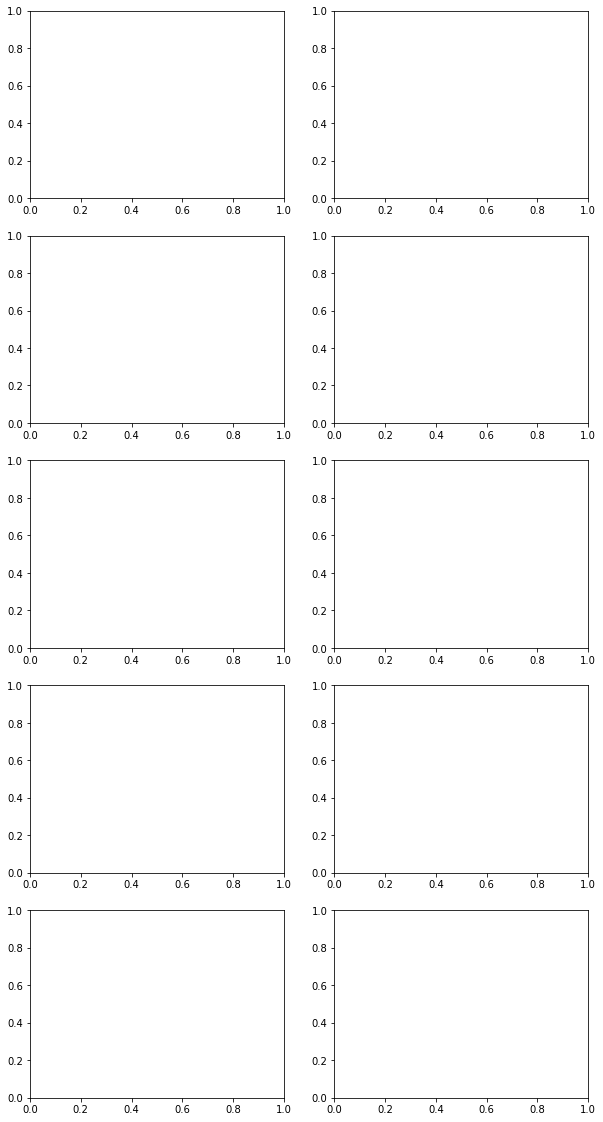

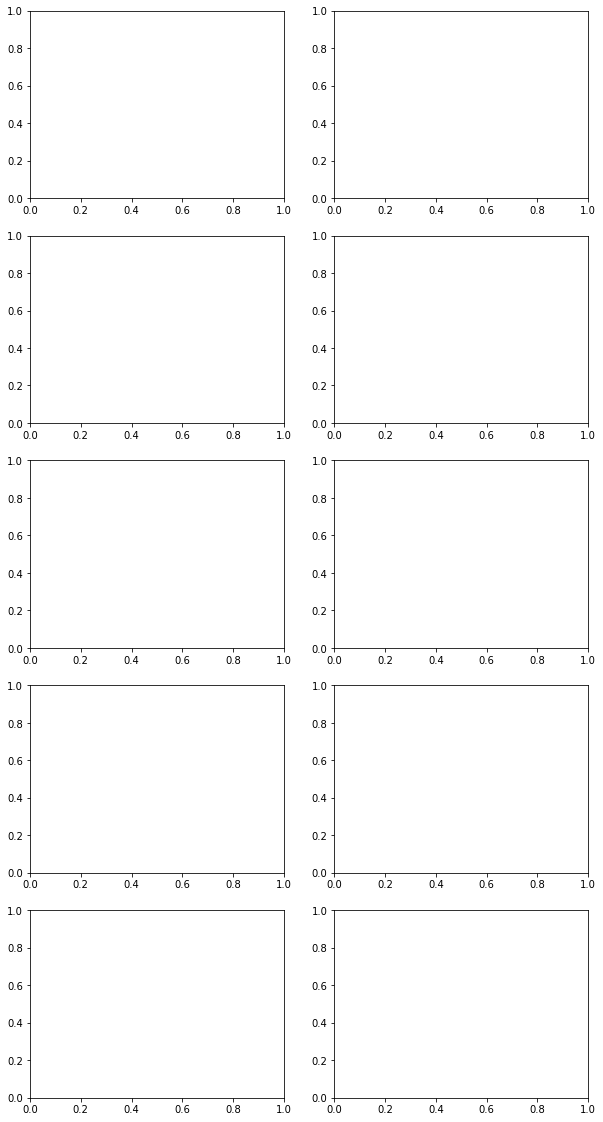

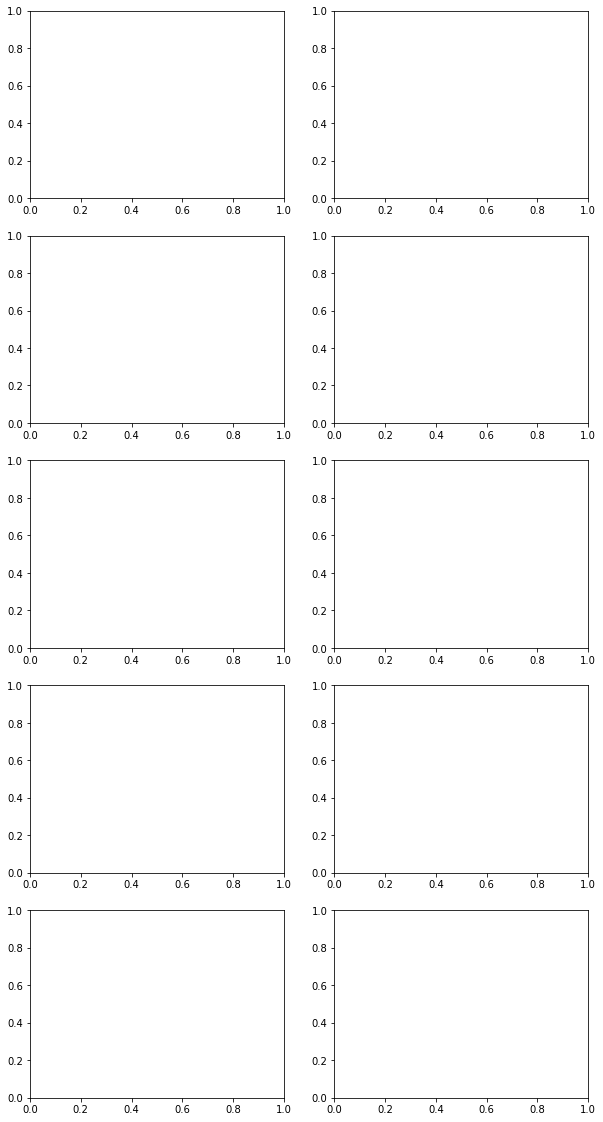

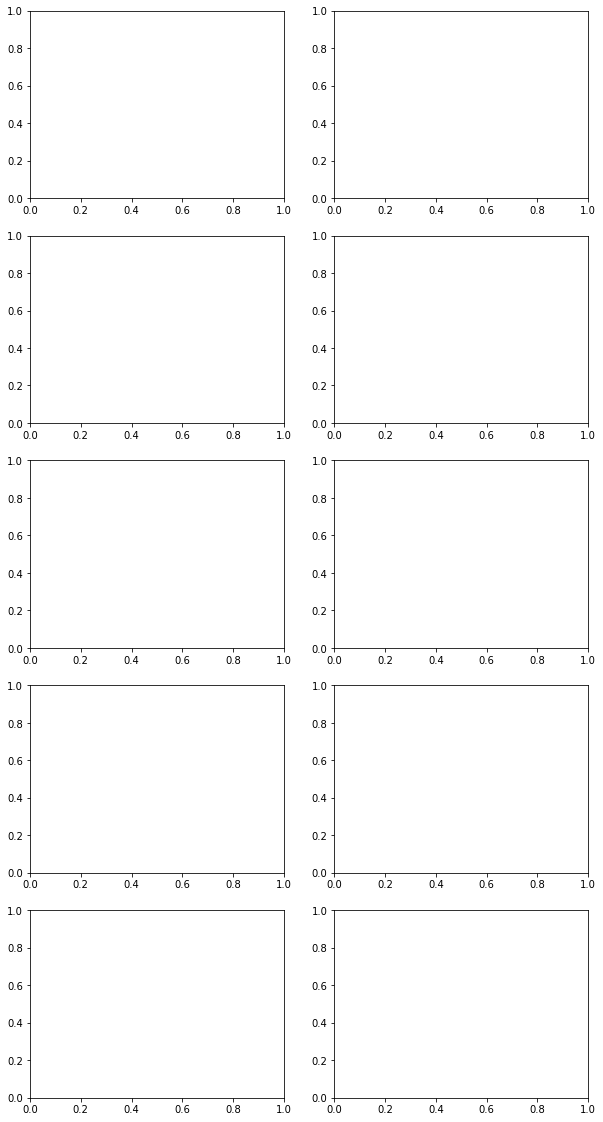

In [100]:
methods = ['lgb','LSTM','VAR','Kernel_RBF']

res_regre = []

for meth in methods:

    _, Val_pred, _ = pred_regression_methods(Data,dataset['data'],
                                    N_test=N_pred,
                                    method = meth,
                                    N_val = 10,
                                    pred_meth = 'rolling',
                                    p = 2,
                                    plot=False)
    res_regre.append(Val_pred)

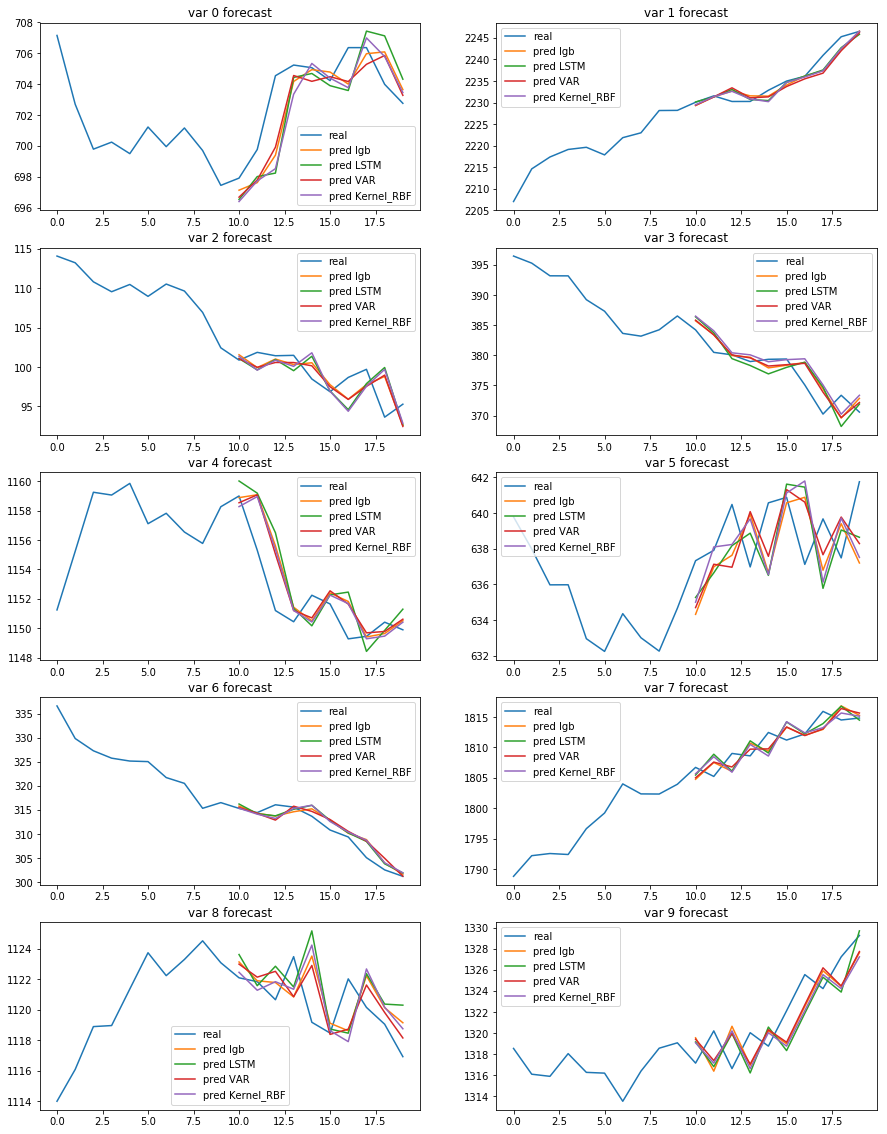

In [101]:
figsizex=15
figsizey=20
N_per_rows=2
N_mem = 10
N_test = N_pred
Dates = None
columns = None
N_TS = np.size(Data, axis=1)

N_rows = int(np.ceil(N_TS / N_per_rows))
f, axes = plt.subplots(N_rows, N_per_rows, figsize=(figsizex, figsizey))

for ts in range(N_TS):
    i = int(ts / N_per_rows)
    j = np.remainder(ts, N_per_rows)
    
    for n,Value_pred in enumerate(res_regre):

        if Dates is None:
            x_mem = np.arange(N_mem + N_test)
            x = np.arange(N_mem,N_mem + N_test)
            if n==0:
                axes[i, j].plot(x_mem, Data[-(N_mem+N_test):,ts],label='real')
                #axes[i, j].plot(x, Data[-(N_test):,ts], 'o', label='real')
            axes[i, j].plot(x, Value_pred[:,ts],  label='pred '+str(methods[n]))
            if columns is None:
                axes[i, j].set_title('var ' + str(ts) + ' forecast')
            else:
                axes[i, j].set_title(str(columns[ts]) + ' forecast')

        axes[i, j].legend()

In [115]:
# CV hmm_gmm 

hmm_gmm = HMM_GraphicalLasso(alpha=200,
                             n_clusters=N_states,
                             verbose=False,
                             mode='scaled',
                             warm_restart=True,
                             repetitions=5,
                             n_jobs=-1)

hmm_gmm.fit(dataset['data'])

print(hmm_gmm.lambdas)

print(results_recap(dataset['states'],hmm_gmm.labels_,dataset['thetas'],hmm_gmm.precisions_))

[0.3124726  0.55564217]
{'homogeneity [0, 1]': 0.9696288948469022, 'completeness [0, 1]': 0.9687790574794256, 'v_measure [0, 1]': 0.9692037898701934, 'adjusted_mutual_info [0, 1]': 0.969180172770085, 'weighted_mean_mcc [-1, 1]': (0.6314674852856016,), 'max_cluster_mean_mcc[-1,1]': (0.6334785506309366,), 'weighted_mean_f1 [0, 1]': (0.5500969937216467,), 'max_cluster_mean_f1[0,1]': (0.5512820512820513,), 'probabilities_clusters': (array([[0.99843505, 0.00554017],
       [0.00156495, 0.99445983]]),), 'max_probabilities_couples': ['Couple: (0, 0), Probability: 0.9984350547730829, MCC: 0.823754471047914, F1_score: 0.7692307692307693', 'Couple: (1, 1), Probability: 0.9944598337950139, MCC: 0.44320263021395917, F1_score: 0.33333333333333337']}


100%|██████████| 1/1 [00:08<00:00,  8.43s/it]


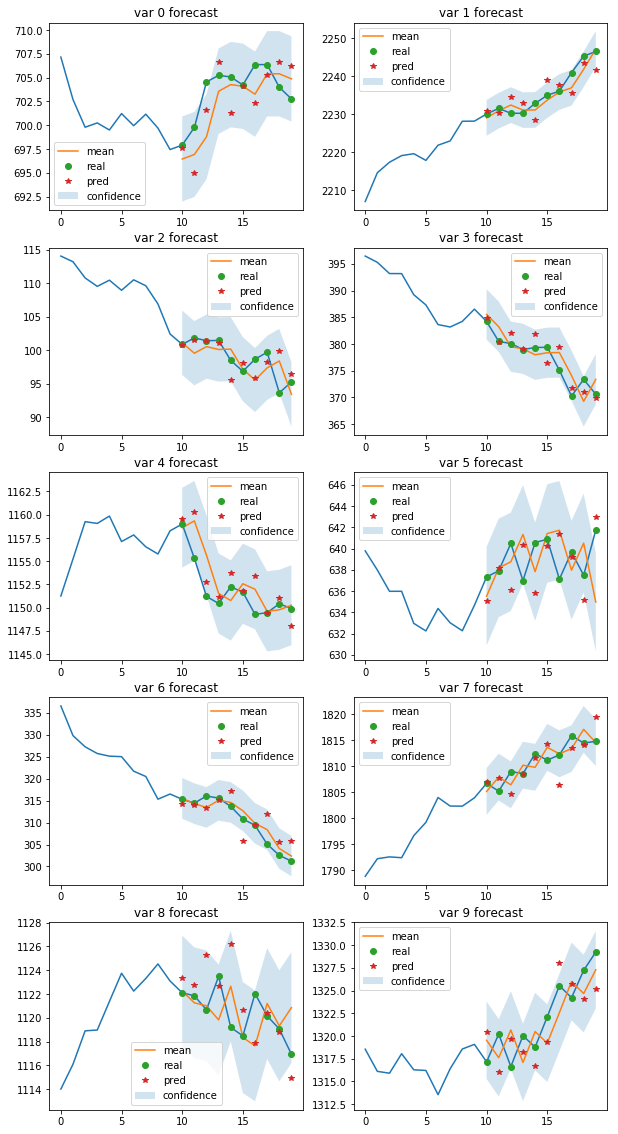

In [116]:
from regain.hmm.utils_pred import pred_HMM_GMM
returns = pred_HMM_GMM(dataset['data'],
                       Data,
                       [200],
                       [N_states],
                       N_test = N_pred,
                       meth = 'viterbi',
                       pred_meth = 'rolling',
                       recrossval = False)

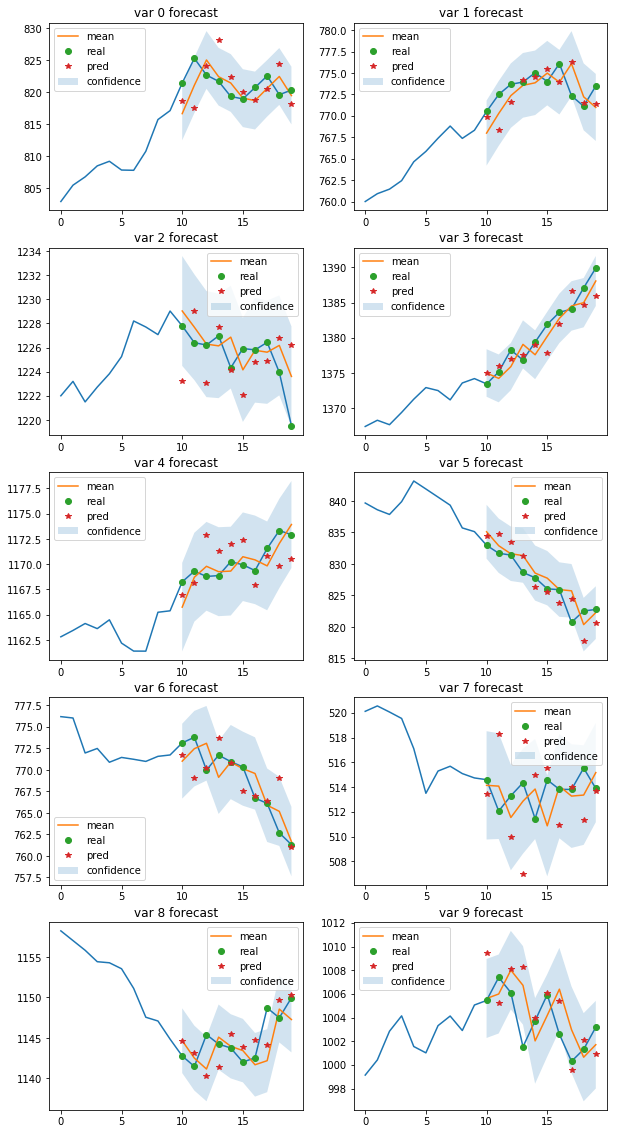

In [72]:
from regain.hmm.utils_pred import pred_from_N_past_days
res = pred_from_N_past_days(dataset['data'],Data,N_past_days=50,N_test=N_pred,pred_meth = 'rolling')

In [117]:
Value, Value_mean = Value_from_returns(Data, returns,N_pred, pred_meth='rolling', perc_var=False)

In [118]:
Value_res, Value_mean_res = Value_from_returns(Data, res,N_pred, pred_meth='rolling', perc_var=False)

In [119]:
res_regre.append(Value)
res_regre.append(Value_mean)
res_regre.append(Value_res)
res_regre.append(Value_mean_res)

In [120]:
methods.append('HMM-GMM')
methods.append('HMM-GMM mean')
methods.append('Last 50 days')
methods.append('Last 50 days mean')

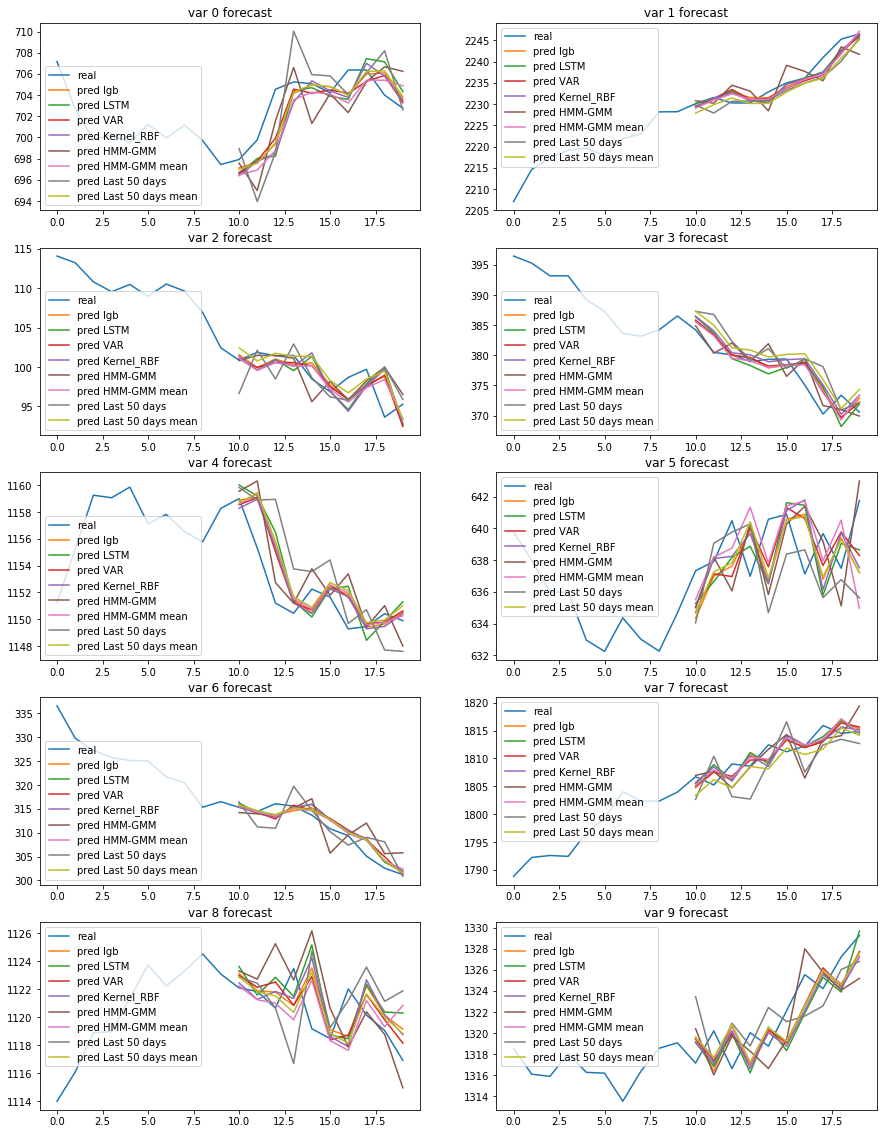

In [121]:
figsizex=15
figsizey=20
N_per_rows=2
N_mem = 10
N_test = N_pred
Dates = None
columns = None
N_TS = np.size(Data, axis=1)

N_rows = int(np.ceil(N_TS / N_per_rows))
f, axes = plt.subplots(N_rows, N_per_rows, figsize=(figsizex, figsizey))
list_all = []
for ts in range(N_TS):
    i = int(ts / N_per_rows)
    j = np.remainder(ts, N_per_rows)
    
    for n,Value_pred in enumerate(res_regre):
        
        absolute_error = abs(Data[-(N_test):,ts]-Value_pred[:,ts])
        MAE = np.mean(absolute_error)
        std = np.std(absolute_error)
        

        if Dates is None:
            x_mem = np.arange(N_mem + N_test)
            x = np.arange(N_mem,N_mem + N_test)
            if n==0:
                axes[i, j].plot(x_mem, Data[-(N_mem+N_test):,ts],label='real')
                #axes[i, j].plot(x, Data[-(N_test):,ts], 'o', label='real')
            axes[i, j].plot(x, Value_pred[:,ts],  label='pred '+str(methods[n]))
            if columns is None:
                axes[i, j].set_title('var ' + str(ts) + ' forecast')
                list_all.append([str(methods[n]),'var ' + str(ts),MAE,std])
            else:
                axes[i, j].set_title(str(columns[ts]) + ' forecast')
                list_all.append([str(methods[n]),str(columns[ts]),MAE,std])

        axes[i, j].legend()

In [124]:
import pandas as pd
df_recap = pd.DataFrame(list_all, columns=['method', 'TS', 'MAE', 'std AB'])

In [145]:
df_recap.loc[df_recap['method'] == 'Last 50 days mean']['MAE'].mean()

2.0515185214723286

In [22]:
print(df_recap.to_string())

               method     TS       MAE    std AB
0                 lgb  var 0  0.930892  0.358560
1                LSTM  var 0  1.239043  0.685484
2                 VAR  var 0  0.718125  0.484490
3          Kernel_RBF  var 0  1.011619  0.482292
4             HMM-GMM  var 0  2.400340  1.709860
5        HMM-GMM mean  var 0  0.848322  0.481937
6        Last 50 days  var 0  1.116040  0.678109
7   Last 50 days mean  var 0  0.941925  0.670066
8                 lgb  var 1  1.641742  1.347424
9                LSTM  var 1  1.356740  1.037450
10                VAR  var 1  1.373624  0.979129
11         Kernel_RBF  var 1  1.366169  1.048246
12            HMM-GMM  var 1  2.423016  2.067683
13       HMM-GMM mean  var 1  1.246249  0.953211
14       Last 50 days  var 1  1.640388  1.141473
15  Last 50 days mean  var 1  1.689720  1.069849
16                lgb  var 2  1.256339  0.931149
17               LSTM  var 2  1.151926  0.961033
18                VAR  var 2  0.954991  0.686934
19         Kernel_RB

In [22]:
prec_real = {}

for i,k in enumerate(dataset['states'][-N_pred:]):
    prec_real[str(i)] = dataset['thetas'][k]

In [23]:
mcc, f1 = thetas_comparison(prec_real,returns[3])

0.7953949089757174
0.8386278693775346
0.8386278693775346
0.8386278693775346
0.7953949089757174
0.7953949089757174
-0.07354355067681902
0.42947784519366666
0.42947784519366666
1.0


In [24]:
print('mean MCC precision matrix forecast', mcc,'mean F1 precision matrix forecast', f1)

mean MCC precision matrix forecast 0.668748047477027 mean F1 precision matrix  forecast 0.701392360499912


In [25]:
mcc_last, f1_last = thetas_comparison(prec_real,res[3])

0.1091089451179962
0.1091089451179962
0.1322711693170675
0.07142857142857142
0.15537971921347118
0.1959983830200101
-0.20890725544918334
-0.13497638119975428
0.1392715036327889
0.09600307214746387


In [26]:
print('mean MCC precision matrix forecast', mcc_last,'mean F1 precision matrix  forecast', f1_last )

mean MCC precision matrix forecast 0.06646866723464277 mean F1 precision matrix  forecast 0.35151515151515156
